<div class="alert alert-block alert-success">
    <h2 align="center">Logistic Regression - Iris Dataset</h2>
        <h3 align="center">Fariborz Dolafi</h3>

</div>

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## load iris dataset

In [2]:
iris = pd.read_csv('iris.csv')

In [4]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
iris.drop("Id", axis=1, inplace = True)

In [6]:
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [8]:
# Check for missing values
iris.isnull().sum()


SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
iris.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [10]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
iris.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [12]:
iris.shape

(150, 5)

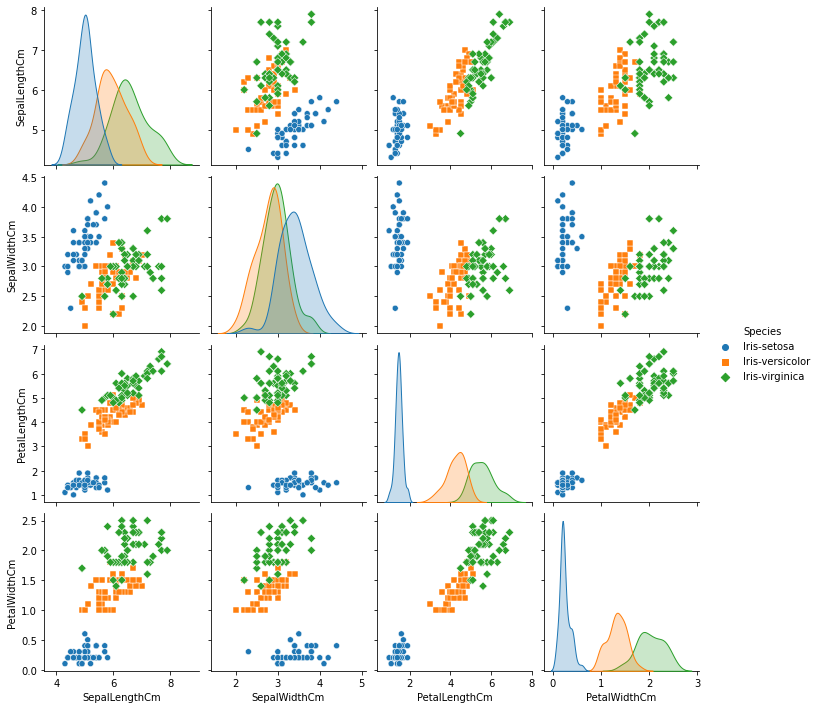

In [13]:
#Show more important features

k01 = sns.pairplot(iris, hue='Species', markers=["o", "s", "D"])
plt.show()

## Heatmap

<AxesSubplot:>

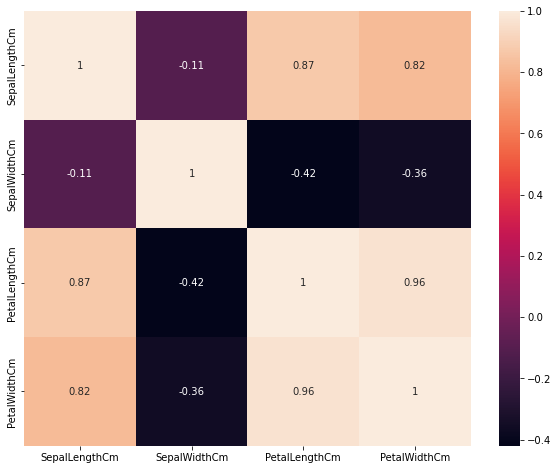

In [14]:
corr = iris.corr()
plt.figure(figsize=(10,8)) 
sns.heatmap(corr, cmap='rocket', annot=True)


## Train and Test 

In [17]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split  
from sklearn import metrics 

In [18]:
X = iris.drop(['Species'], axis=1)
y = iris['Species']


In [19]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [20]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

## Train-Test Split 

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)


In [22]:
print(X_train.shape)
print(X_test.shape)


(112, 4)
(38, 4)


In [23]:
print(y_train.shape)
print(y_test.shape)

(112,)
(38,)


In [52]:
X_test.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
128,6.4,2.8,5.6,2.1
18,5.7,3.8,1.7,0.3
130,7.4,2.8,6.1,1.9
105,7.6,3.0,6.6,2.1
107,7.3,2.9,6.3,1.8


In [53]:
y_test.head(5)

128    Iris-virginica
18        Iris-setosa
130    Iris-virginica
105    Iris-virginica
107    Iris-virginica
Name: Species, dtype: object

## Logistic Regression

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
lgreg = LogisticRegression()
lgreg.fit(X_train, y_train)

LogisticRegression()

In [29]:
y_pred = lgreg.predict(X_test)

In [54]:
y_test.head(5)

128    Iris-virginica
18        Iris-setosa
130    Iris-virginica
105    Iris-virginica
107    Iris-virginica
Name: Species, dtype: object

In [57]:
y_pred

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor'], dtype=object)

## Model Evaluation

In [31]:
print('accuracy: ', (metrics.accuracy_score(y_test, y_pred)))

accuracy:  0.9736842105263158


In [33]:
# confusion matrix - method 01

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm


array([[18,  0,  0],
       [ 0,  7,  1],
       [ 0,  0, 12]], dtype=int64)

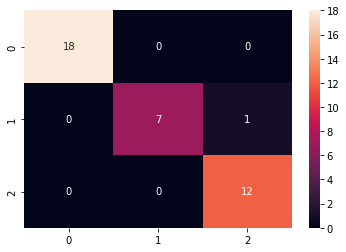

In [34]:
sns.heatmap(cm, annot=True , cmap='rocket')
plt.show()

<AxesSubplot:xlabel='predicted', ylabel='actual'>

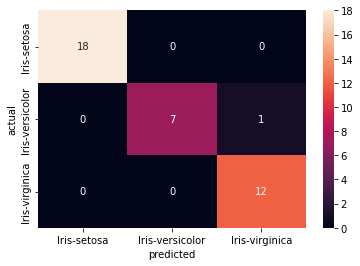

In [36]:
# confusion matrix - method 02

import seaborn as sn

ct = pd.crosstab(y_test, y_pred, rownames=['actual'], colnames=['predicted'])
sn.heatmap(ct, annot=True)


In [37]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       1.00      0.88      0.93         8
 Iris-virginica       0.92      1.00      0.96        12

       accuracy                           0.97        38
      macro avg       0.97      0.96      0.96        38
   weighted avg       0.98      0.97      0.97        38



In [38]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred, normalize=True)

0.9736842105263158

In [39]:
# Recall
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average='weighted')  


0.9736842105263158

In [40]:
# Precision
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average='weighted')


0.9757085020242916

In [41]:
# F1-score
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted')


0.9733333333333335

## Visualization

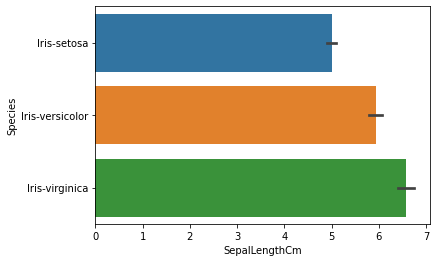

In [42]:
sns.barplot(x="SepalLengthCm",y="Species",data=iris)
plt.show()


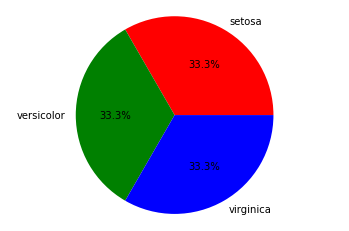

In [43]:
labels='setosa','versicolor','virginica'
colors = ['red','green','blue']
g=iris.Species.value_counts()
plt.pie(g,labels=labels,colors=colors,autopct='%1.1f%%', shadow=False)
plt.axis('equal')
plt.xticks(rotation=0)
plt.show()

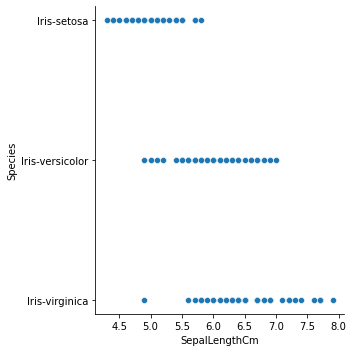

In [44]:
sns.relplot(x="SepalLengthCm", y="Species", data=iris)


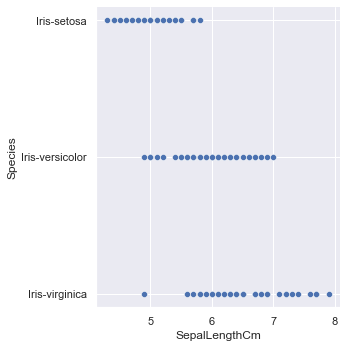

In [45]:
sns.set_theme(style="darkgrid")
sns.relplot(x="SepalLengthCm", y="Species", data=iris)

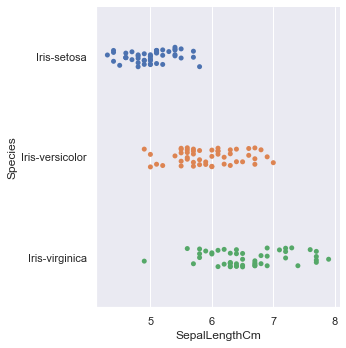

In [46]:
sns.catplot(x="SepalLengthCm", y="Species", data=iris)

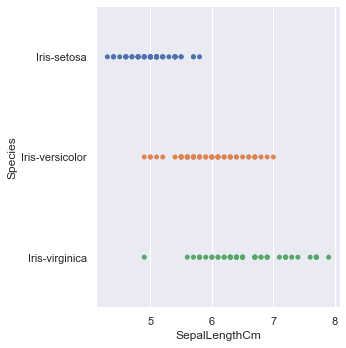

In [47]:
sns.catplot(x="SepalLengthCm", y="Species", jitter=False, data=iris)

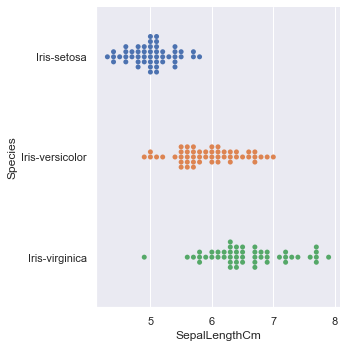

In [48]:
sns.catplot(x="SepalLengthCm", y="Species", kind="swarm", data=iris)

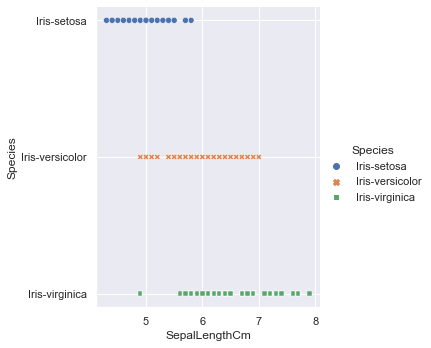

In [49]:
sns.relplot(x="SepalLengthCm", y="Species", hue="Species", style="Species",data=iris)

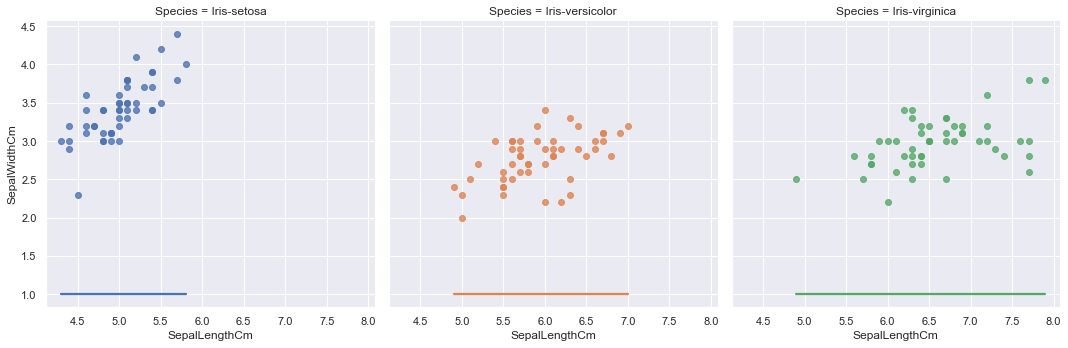

In [50]:
sns.lmplot(x='SepalLengthCm', y='SepalWidthCm', data=iris, logistic=True, n_boot=100,
          hue='Species', col='Species');

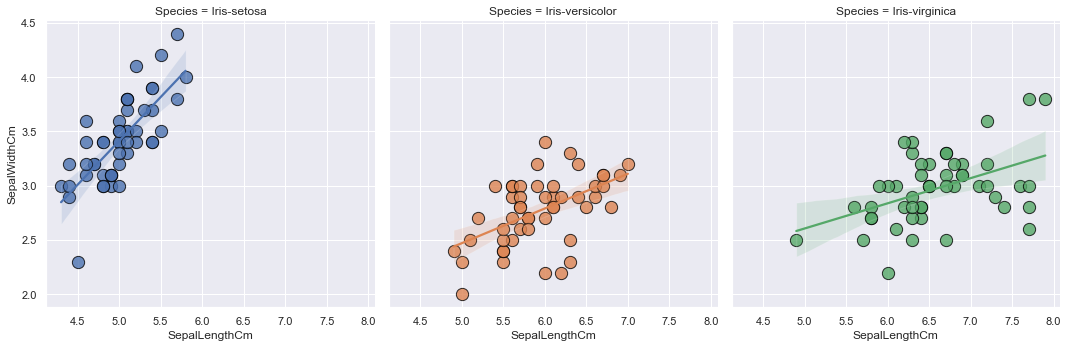

In [51]:
sns.lmplot(x='SepalLengthCm', y='SepalWidthCm', 
           data=iris, 
           hue='Species',
           col='Species',
           scatter_kws={'s': 150, 'edgecolor': 'black'}
           );


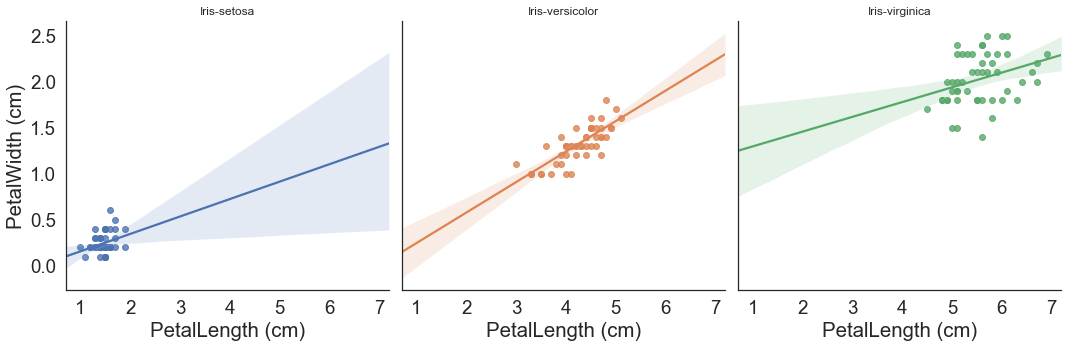

In [101]:
sns.set(style='white', font_scale=1.7)
g = sns.lmplot(x='PetalLengthCm', y='PetalWidthCm', data=iris, hue='Species', col='Species', truncate=False)


g.set_titles('{col_name}')
g.set_xlabels('PetalLength (cm)')
g.set_ylabels('PetalWidth (cm)')
plt.tight_layout()
